# Finder chart with parallax and proper motion

And possibly the depiction of the orbit.

In [1]:
from astropy.time import Time
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import exoplanet as xo

from astropy import constants

# conversion constant from au to R_sun
au_to_R_sun = (constants.au / constants.R_sun).value

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


We take orbital parameters for Luhman 16 from Table 5 of [Lazorenko & Sahlmann 2018](https://ui.adsabs.harvard.edu/abs/2018A%26A...618A.111L/abstract):

| Param | Value|
|-- | -- |
|$a$ (mas)			| 1784.0|
|$a$ (AU)			| 3.557|
|$e$			      | 0.343 |
|$P$ (yr)			| 27.54|
|$T_0$ (yr)			| 2017.78|
|$i$ (deg)			| 100.26|
|$\omega$ (deg)			| 128.1|
|$\Omega$ (deg)			| 139.67|
|$M_{tot}$ ($M_{\mathrm{Jup} }$)	| 		62.06|
|$M_A$ ($M_{\mathrm{Jup} }$)		| 	33.51|
|$M_B$ ($M_{\mathrm{Jup} }$)		| 	28.55|

In [3]:
parallax = 501.557 # mas

In [4]:
a = (3.557 * u.AU).to(u.Rsun).value
e = 0.343
i = 100.26 * np.pi / 180  # [rad]
omega = 128.1 * np.pi / 180  # Pourbaix reports omega_2, but we want omega_1
Omega = 139.67 * np.pi / 180
P = 27.54 * 365.25  # days

T0_orig = Time(2017.78, format="decimalyear")
T0_orig.format = "jd"
T0 = T0_orig.value  # [Julian Date]

In [5]:
# instantiate the orbit
orbit = xo.orbits.KeplerianOrbit(
    a=a, t_periastron=T0, incl=i, ecc=e, omega=omega, Omega=Omega, 
    m_planet=0.027, m_star=0.032, m_planet_units=u.Msun, r_star = 0.10045
)

In [6]:
import theano
import theano.tensor as tt

In [7]:
t_arr = ( T0_orig - P/2*u.day) + np.linspace(0*u.day, P*u.day, num=200)  # days

/home/gully/miniconda3/envs/varsity/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "taiutc" yielded 41 of "dubious year (Note 4)"
  ErfaWarning)


In [8]:
t = np.linspace(T0 - P/2, T0 + P/2, num=200)  # days
rho, theta = theano.function([], orbit.get_relative_angles(t, parallax))()

In [9]:
current_jd = Time.now().jd
current_decyear = Time.now().decimalyear

In [10]:
rho_now, theta_now = theano.function([], orbit.get_relative_angles(current_jd, parallax))()

In [11]:
Thst_i = Time(2014.64, format="decimalyear").jd
Thst_f = Time(2016.76, format="decimalyear").jd

In [12]:
t_hst = np.linspace(Thst_i,Thst_f, num=200)  # days
rho_hst, theta_hst = theano.function([], orbit.get_relative_angles(t_hst, parallax))()

In [13]:
#import seaborn as sns

In [14]:
#sns.set_style('darkgrid')
#sns.set_context('talk')

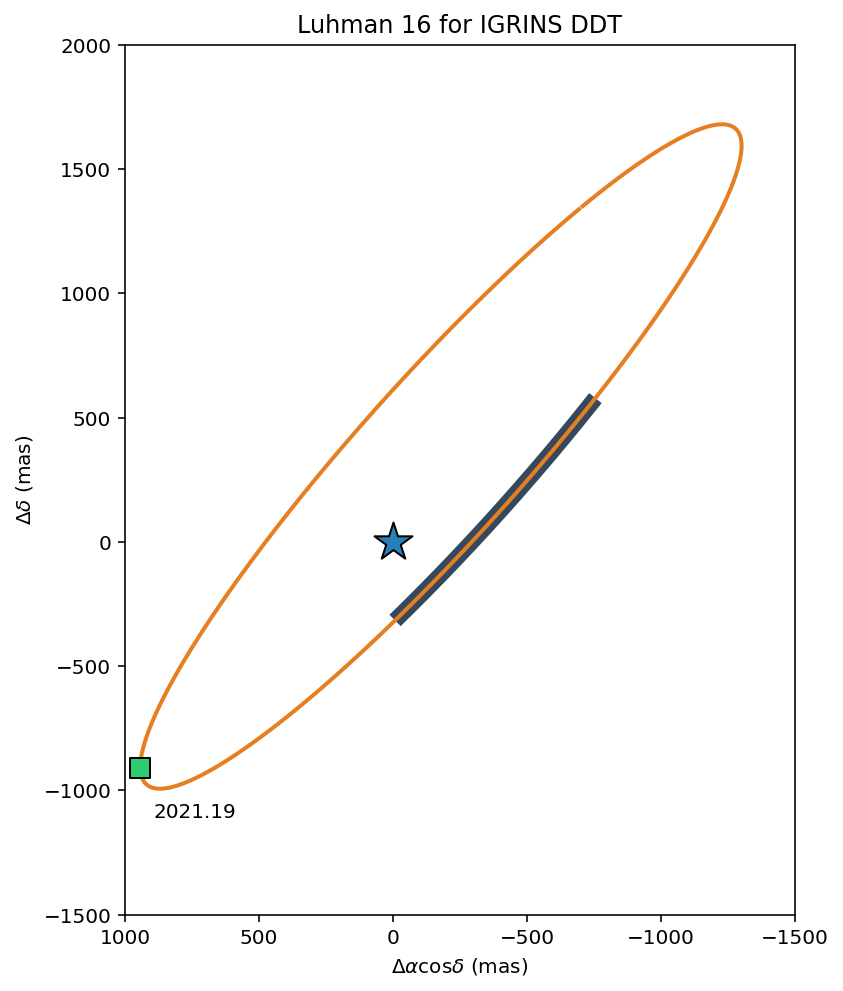

In [15]:
# Plot the orbit
fig, ax = plt.subplots(nrows=1, figsize=(6, 8))

xs = rho * np.cos(theta)  # X is north
ys = rho * np.sin(theta)  # Y is east
plt.scatter([0], [0], marker='*', s=400, c='#2980b9', ec='k')
ax.plot(ys, xs, lw=2, color='#e67e22')



xnow = rho_now * np.cos(theta_now)  # X is north
ynow = rho_now * np.sin(theta_now)  # Y is east

xhst = rho_hst * np.cos(theta_hst)  # X is north
yhst = rho_hst * np.sin(theta_hst)  # Y is east

ax.plot(yhst, xhst, lw=8, color='#34495e', zorder=1)


label = '{:0.2f}'.format(current_decyear)
plt.scatter([ynow], [xnow], marker='s', s=100, c='#2ecc71', ec='k', 
            label = label, zorder=10)

plt.text(ynow-50, xnow-200, label)

plt.ylim(-1500, 2000)
plt.xlim(1000, -1500)
plt.xlabel(r'$\Delta \alpha \cos \delta$ (mas)')
plt.ylabel(r'$\Delta \delta $ (mas)')
plt.title('Luhman 16 for IGRINS DDT')
plt.savefig('../figures/Luhman16_orbit_demo.png', bbox_inches='tight', dpi=300)

What are the separation and PA right now?

In [16]:
rho_now

array(1311.39239639)

In [17]:
theta_now * 180/np.pi

133.98890312973776

## Position on the sky

In [18]:
Dt_arr = t_arr - t_arr[0]  # days

/home/gully/miniconda3/envs/varsity/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 41 of "dubious year (Note 3)"
  ErfaWarning)


In [19]:
Dt_arr.to(u.year)

<Quantity [ 0.        ,  0.13839196,  0.27678392,  0.41517588,  0.55356784,
            0.6919598 ,  0.83035176,  0.96874372,  1.10713568,  1.24552764,
            1.3839196 ,  1.52231156,  1.66070352,  1.79909548,  1.93748744,
            2.0758794 ,  2.21427136,  2.35266332,  2.49105528,  2.62944724,
            2.7678392 ,  2.90623116,  3.04462312,  3.18301508,  3.32140704,
            3.45979899,  3.59819095,  3.73658291,  3.87497487,  4.01336683,
            4.15175879,  4.29015075,  4.42854271,  4.56693467,  4.70532663,
            4.84371859,  4.98211055,  5.12050251,  5.25889447,  5.39728643,
            5.53567839,  5.67407035,  5.81246231,  5.95085427,  6.08924623,
            6.22763819,  6.36603015,  6.50442211,  6.64281407,  6.78120603,
            6.91959799,  7.05798995,  7.19638191,  7.33477387,  7.47316583,
            7.61155779,  7.74994975,  7.88834171,  8.02673367,  8.16512563,
            8.30351759,  8.44190955,  8.58030151,  8.71869347,  8.85708543,
            

In [20]:
compA_coords = theano.function([], orbit.get_star_position(t, parallax))()
compB_coords = theano.function([], orbit.get_planet_position(t, parallax))()

In [21]:
xA, yA, zA = compA_coords
xB, yB, zB = compB_coords

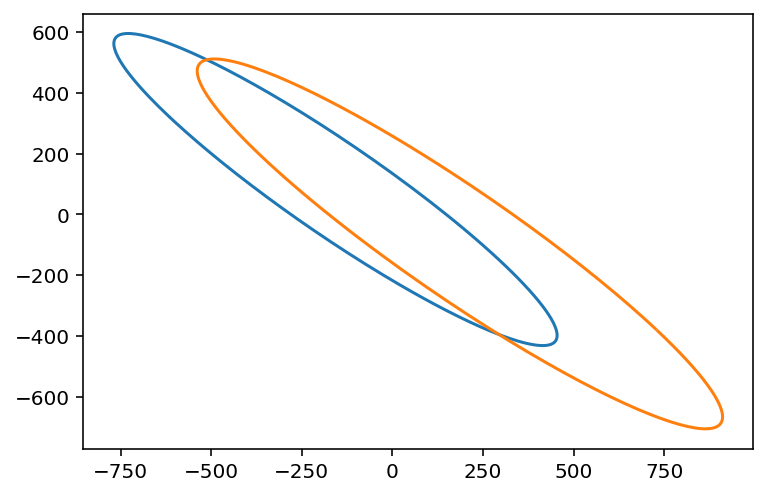

In [22]:
plt.plot(xA, yA)
plt.plot(xB, yB)

## Compute the parallax and proper motion

Compute the parallax factors indirectly see this astropy Issue:  
https://github.com/astropy/astropy/issues/9140

In [23]:
from astropy.coordinates import SkyCoord

In [24]:
distance = 1.0/0.50114 * u.pc

In [25]:
c = SkyCoord(ra=96.9342078*u.degree /np.cos(53.3179180*np.pi/180), 
             dec=-53.3179180*u.degree, 
             distance=distance, 
             pm_ra_cosdec=-2763*u.mas/u.yr,
             pm_dec=+358*u.mas/u.yr, 
             radial_velocity=0.0*u.km/u.s,
             frame='icrs',
             obstime=T0_orig
            )

In [26]:
c_infinity = SkyCoord(ra=96.9342078*u.degree/np.cos(53.3179180*np.pi/180), 
             dec=-53.3179180*u.degree, 
             distance=1e9*u.pc, 
             pm_ra_cosdec=0.0*u.mas/u.yr,
             pm_dec=0.0*u.mas/u.yr, 
             radial_velocity=0.0*u.km/u.s,
             frame='icrs',
             obstime=T0_orig
            )

In [27]:
coords = c.apply_space_motion(dt=Dt_arr) 
coords_gcrs = coords.transform_to('gcrs')

/home/gully/miniconda3/envs/varsity/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "taiutc" yielded 140 of "dubious year (Note 4)"
  ErfaWarning)
/home/gully/miniconda3/envs/varsity/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 140 of "dubious year (Note 3)"
  ErfaWarning)


In [28]:
ra_t   = coords_gcrs.ra
dec_t  = coords_gcrs.dec
cosd_t = np.cos(dec_t.to('radian'))

In [29]:
coord_inf = c_infinity.apply_space_motion(dt=Dt_arr)
coord_inf_gcrs = coord_inf.transform_to('gcrs')

/home/gully/miniconda3/envs/varsity/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "pmsafe" yielded 200 of "distance overridden (Note 6)"
  ErfaWarning)


In [30]:
ra0_t = coord_inf_gcrs.ra
dec0_t = coord_inf_gcrs.dec

dra = ((ra_t - ra0_t) * cosd_t).to('arcsec')  # in arcsec
ddec = (dec_t - dec0_t).to('arcsec')          # in arcsec

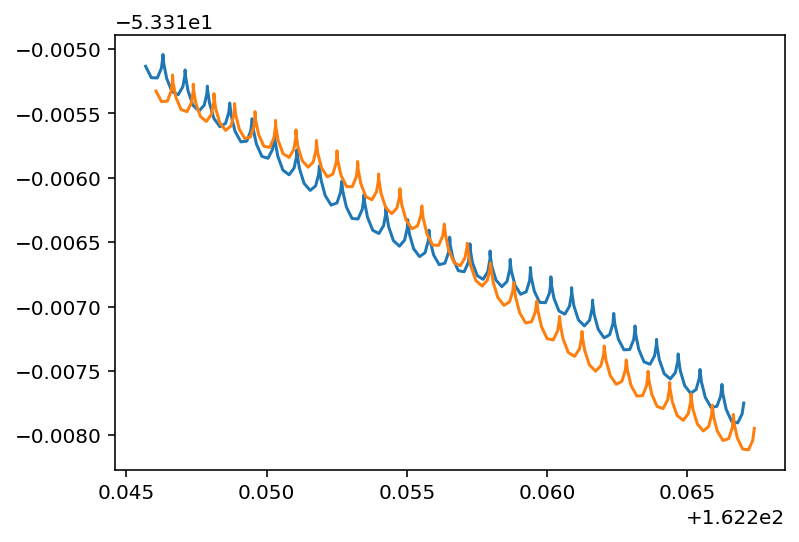

In [31]:
plt.plot(c.ra+dra+xA*u.mas, c.dec+ddec+yA*u.mas)
plt.plot(c.ra+dra+xB*u.mas, c.dec+ddec+yB*u.mas)

## Overlay on a 2MASS finder chart

In [32]:
from astroplan.plots import plot_finder_image
from astroplan import FixedTarget
import matplotlib.pyplot as plt

In [33]:
targ = FixedTarget.from_name("Luhman 16")

from astroquery.skyview import SkyView; 

#SkyView.list_surveys()

In [34]:
c_TESS = SkyCoord(ra=162.303282427*u.degree, 
             dec=-53.317573814*u.degree, 
             distance=distance, 
             pm_ra_cosdec=-2763*u.mas/u.yr,
             pm_dec=+358*u.mas/u.yr, 
             radial_velocity=20.0*u.km/u.s,
             frame='icrs',
             obstime=Time('2019.26', format='decimalyear')
            )

In [35]:
from astroquery.vizier import Vizier

from astropy.coordinates import Angle

Vizier.ROW_LIMIT = -1
result = Vizier.query_region(
    targ.coord,
    catalog=["I/345/gaia2"],
    radius=Angle(600, "arcsec"),
)

result = result["I/345/gaia2"].to_pandas()
result = result[result.Gmag < 14]

# Apply correction for proper motion
year = ((current_jd - 2457206.375) * u.day).to(u.year)
pmra = (
    ((np.nan_to_num(np.asarray(result.pmRA)) * u.milliarcsecond / u.year) * year)
    .to(u.deg)
    .value
)
pmdec = (
    ((np.nan_to_num(np.asarray(result.pmDE)) * u.milliarcsecond / u.year) * year)
    .to(u.deg)
    .value
)
result.RA_ICRS += pmra
result.DE_ICRS += pmdec

# Gently size the points by their Gaia magnitude
result['sizes'] = 64.0 / 2 ** (result["Gmag"] / 5.0)

In [36]:
! ls ../data/HST

field.xyvi  stx1177_Supp.zip  sumF814W_gaiaWCS.fits


In [37]:
from astropy.io import fits

In [38]:
from astropy.wcs import WCS

(50.0, 250.0)

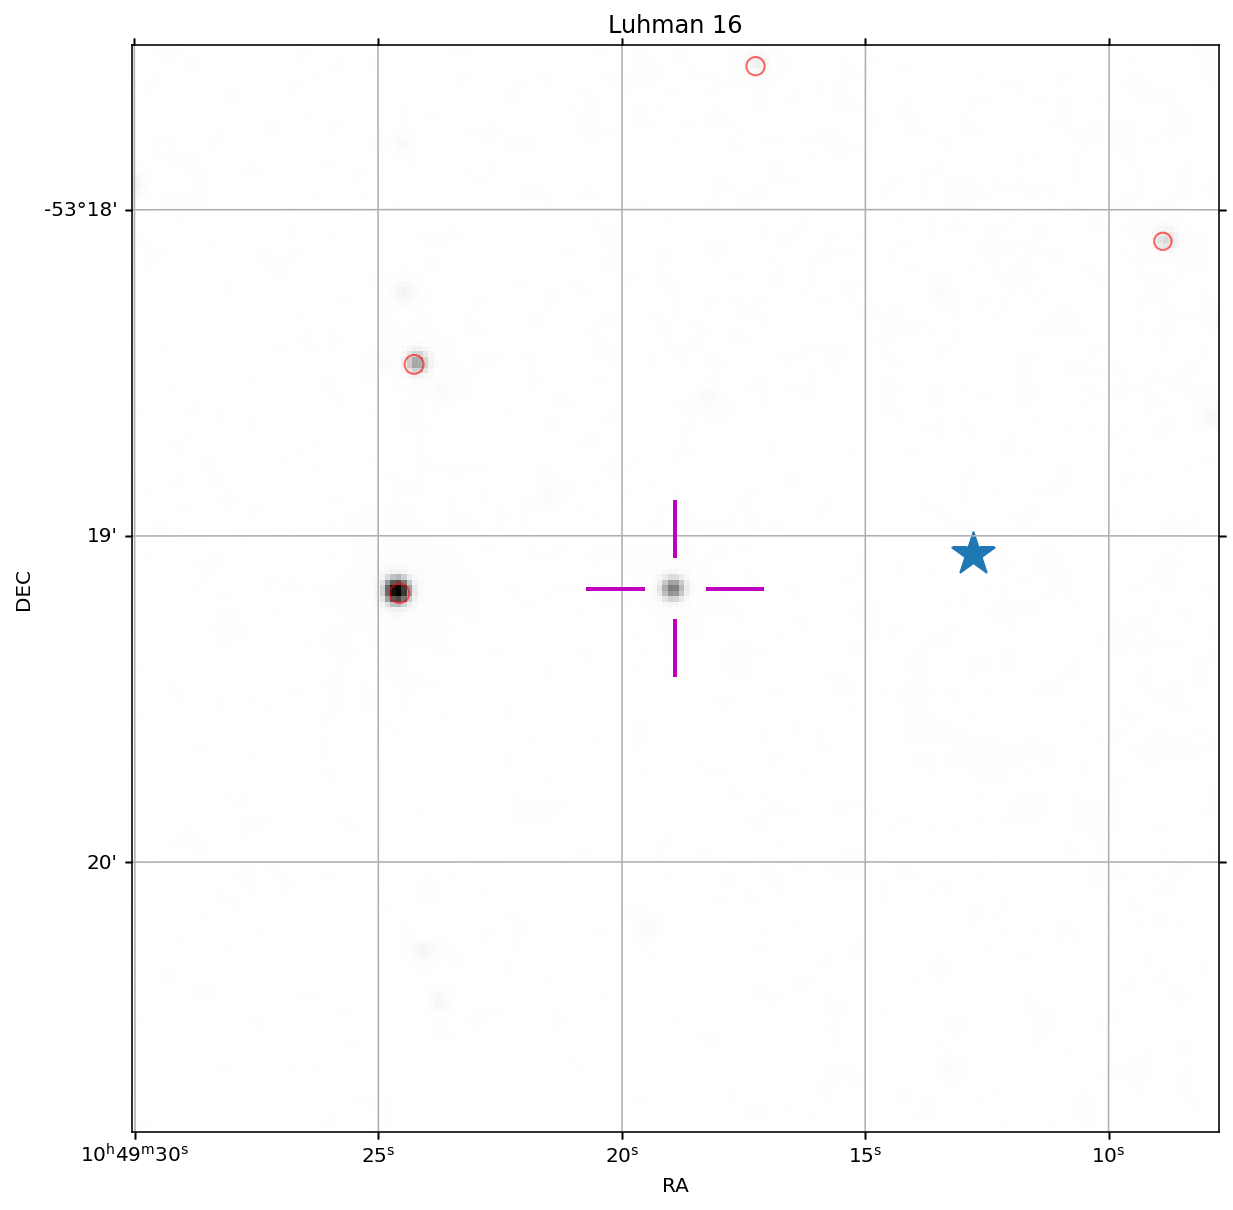

In [40]:
plt.figure(figsize=(10,10))
ax, hdu = plot_finder_image(targ, survey='2MASS-H', log=True, reticle=True, grid=True, fov_radius=5*u.arcmin)

cos_dec = np.cos(c.dec.to(u.radian))
net_ra = c.ra+dra+xA*u.mas
net_raB = c.ra+dra+xB*u.mas

#ax.scatter(net_ra, c.dec+ddec+yA*u.mas, transform=ax.get_transform('icrs'), s=1)
#ax.scatter(net_raB, c.dec+ddec+yB*u.mas, transform=ax.get_transform('icrs'), s=1)
ax.scatter(c_TESS.ra, c_TESS.dec, transform=ax.get_transform('icrs'), s=500, marker='*')

ax.scatter(result.RA_ICRS.values, result.DE_ICRS.values, s=result.sizes.values*8, transform=ax.get_transform('icrs'), 
           alpha=0.6, fc='none', ec='r')

ax.set_xlim(50, 250)
ax.set_ylim(50,250)

Too zoomed out.  Let's try the HST data!

In [41]:
from astropy.nddata import Cutout2D

The HST data fails because the header is malformed!  Womp womp.

```python
hdu = fits.open('../data/HST/sumF814W_gaiaWCS.fits/sumF814W_gaiaWCS.fits')[0]
wcs = WCS(hdu.header)
cutout = Cutout2D(hdu.data, targ.coord, (10,10), wcs=wcs)
```

fail!

Let's try the TESS data, which is coarse but standardized.

In [42]:
import lightkurve as lk

In [43]:
sr = lk.search_tesscut('Luhman 16', )

In [44]:
tpf = sr.download(cutout_size=(21, 41))

(2.0, 18.0)

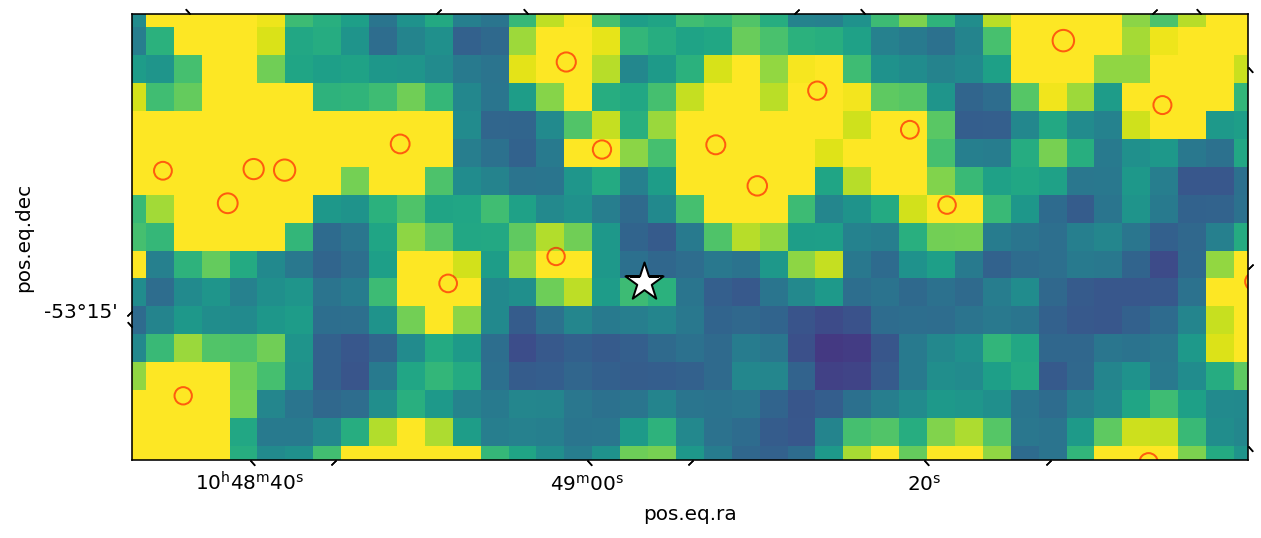

In [45]:
plt.figure(figsize=(10,10))
ax = plt.subplot(projection=tpf.wcs, label='overlays')
ax.imshow(tpf.flux[300].value, vmin=100, vmax=300, origin='lower')

cos_dec = np.cos(c.dec.to(u.radian))
net_ra = c.ra+dra+xA*u.mas
net_raB = c.ra+dra+xB*u.mas

#ax.scatter(net_ra/cos_dec, c.dec+ddec+yA*u.mas, transform=ax.get_transform('icrs'), s=1)
#ax.scatter(net_raB/cos_dec, c.dec+ddec+yB*u.mas, transform=ax.get_transform('icrs'), s=1)


ax.scatter(result.RA_ICRS.values, result.DE_ICRS.values, s=result.sizes.values*8, transform=ax.get_transform('icrs'), 
           alpha=0.6, fc='none', ec='r')

ax.scatter(c_TESS.ra, c_TESS.dec, s=400, marker='*',transform=ax.get_transform('icrs'), 
           alpha=1, fc='w', ec='k')

ax.set_xlim(0, 40)
ax.set_ylim(2, 18)

In [46]:
tpf.interact()

In [48]:
lk.__version__

'2.0.3'

/home/gully/miniconda3/envs/varsity/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1366: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
bokeh.server.protocol_handler - ERROR - error handling message
 message: Message 'PATCH-DOC' content: {'events': [{'kind': 'ModelChanged', 'model': {'id': '1005'}, 'attr': 'indices', 'new': [10]}], 'references': []} 
 error: TypeError('cannot unpack non-iterable numpy.float32 object')
Traceback (most recent call last):
  File "/home/gully/miniconda3/envs/varsity/lib/python3.7/site-packages/bokeh/server/protocol_handler.py", line 90, in handle
    work = await handler(message, connection)
  File "/home/gully/miniconda3/envs/varsity/lib/python3.7/site-packages/bokeh/server/session.py", line 67, in _needs_document_lock_wrapper
    result = func(self, *args, **kwargs)
  File "/home/gully/miniconda3/envs/varsity/lib/python3.7/site-packages/bokeh/server/session.py", line 261, in _handle_patch
    message.a